**Name:** \_\_\_\_\_ Chan Tai To

**EID:** \_\_\_\_\_ 54791401

# CS4487 - Tutorial 9: PyTorch and Neural Networks

In this tutorial, we will explore the deep learning framework - [PyTorch](https://pytorch.org/), and to train a simple neural network with PyTorch.

## What is PyTorch?
PyTorch is a [Torch](http://torch.ch/) based machine learning library for Python. It's similar to numpy but with powerful GPU support. It was developed by Facebook's AI Research Group in 2016. PyTorch offers Dynamic Computational Graph such that you can modify the graph on the go with the help of autograd. PyTorch is also faster in some cases than other frameworks.

## PyTorch Pros and Cons
### Pros
#### Simple Library
PyTorch code is simple. It is easy to understand, and you use the library instantly. For example, take a look at the code snippet below: 
``` python
class Net(torch.nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer = torch.nn.Linear(3, 1) #Fully connected layer with 3 input nodes and 1 output node

   def forward(self, x):
       x = self.layer(x)      
       return x
```
As above, you can easily define the network model, and understanding the code quicky without much training.
#### Dynamicn Computational Graph
![DCG](./dynamic_graph.gif)
<center><a href="https://algorithmia.com/blog/exploring-the-deep-learning-framework-pytorch">Image Source: Exploring Deep Learning with PyTorch<a> </center>
Pytorch offers Dynamic Computational Graph (DAG). Computational graphs is a way to express mathematical expressions in graph models or theories such as nodes and edges. The node will do the mathematical operation, and the edge is a Tensor that will be fed into the nodes and carries the output of the node in Tensor.

DAG is a graph that holds arbitrary shape and able to do operations between different input graphs. Every iteration, a new graph is created. So, it is possible to have the same graph structure or create a new graph with a different operation, or we can call it a dynamic graph. 
#### Better Performance
Communities and researchers, benchmark and compare frameworks to see which one is faster. A GitHub repo [Benchmark on Deep Learning Frameworks and GPUs](https://github.com/u39kun/deep-learning-benchmark) reported that PyTorch is faster than the other framework in term of images processed per second.

As you can see below, the comparison graphs with vgg16 and resnet152 

![vgg16](./111318_0831_PyTorchTuto2.png)
![resnet152](./111318_0831_PyTorchTuto3.png)


#### Native Python 
PyTorch is more python based. For example, if you want to train a model, you can use native control flow such as looping and recursions without the need to add more special variables or sessions to be able to run them. This is very helpful for the training process.

Pytorch also implements Imperative Programming, and it's definitely more flexible. So, it's possible to print out the tensor value in the middle of a computation process. 
### Cons
No specified training or testing visualization library.





## Installing PyTorch
PyTorch is a Python-based scientific computing package target to use the power of GPUs and to provide maximum flexibility and speed. Thus, we default that you have installed the Python (version > 3.0) with [Anaconda](https://www.anaconda.com/). Here, we only introduce how to install PyTorch with CPU. 

### Windows
It's straightforward to install it in Windows. You can choose to use a virtual environment or install it directly with root access. Type this command in the terminal 

> pip3 install --upgrade torch==1.3.0+cpu torchvision==0.4.1+cpu -f https://download.pytorch.org/whl/torch_stable.html

### Mac
Type this command in the terminal
>  pip3 install --upgrade torch torchvison




## PyTorch Framework Basics

Let's learn the basic concepts of PyTorch before we deep dive. PyTorch uses Tensor for every variable similar to numpy's ndarray but with GPU computation support. Here we will explain the network model, loss function, Backprop, and Optimizer. More information about PyTorch, please refer to offical quick [tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html). 

### Network Model

The network can be constructed by subclassing the torch.nn. There are 2 main parts, 

1. The first part is to define the parameters and layers that you will use.
2. The second part is the main task called the forward process that will take an input and predict the output.

``` python
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 20, 5)
        self.conv2 = nn.Conv2d(20, 40, 5)
        self.fc1 = nn.Linear(320, 10)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       x = F.relu(self.conv2(x))
       x = x.view(-1, 320)
       x = F.relu(self.fc1(x))
       return F.log_softmax(x)

net = Model()

```

As you can see above, you create a class of nn.Module called Model. It contains 2 Conv2d layers and a Linear layer. The first conv2d layer takes an input of 3 and the output shape of 20. The second layer will take an input of 20 and will produce an output shape of 40. The last layer is a fully connected layer in the shape of 320 and will produce an output of 10.

The forward process will take an input of X and feed it to the conv1 layer and perform ReLU function,

Similarly, it will also feed the conv2 layer. After that, the x will be reshaped into (-1, 320) and feed into the final FC layer. Before you send the output, you will use the softmax activation function.

The backward process is automatically defined by autograd, so you only need to define the forward process. 

### Loss Function

The loss function is used to measure how well the prediction model is able to predict the expected results. PyTorch already has many standard loss functions in the torch.nn module. For example, you can use the Cross-Entropy Loss to solve a multi-class classification problem. It's easy to define the loss function and compute the losses: 
```python
loss_fn = nn.CrossEntropyLoss()
#training process
loss = loss_fn(out, target) 
```
It's easy to use your own loss function calculation with PyTorch. 

### Backprop

To perform the backpropagation, you simply call the los.backward(). The error will be computed but remember to clear the existing gradient with zero_grad() 

```python

net.zero_grad() # to clear the existing gradient
loss.backward() # to perform backpropragation
```

### Optimizer

The torch.optim provides common optimization algorithms. You can define an optimizer with a simple step: 

```python
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)
```

You need to pass the network model parameters and the learning rate so that at every iteration the parameters will be updated after the backprop process. 

## Simple Regression with PyTorch

1. Creating network model

Our network model is a simple Linear layer with an input and an output shape of 1. 


In [1]:
from __future__ import print_function
#
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np



In [2]:
class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer = torch.nn.Linear(1, 1)

   def forward(self, x):
       x = self.layer(x)      
       return x

net = Net()
print(net)


Net(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


2. Test Data 

Before you start the training process, you need to know our data. You make a random function to test our model. $Y = x^3 sin(x) + 3x + 0.8 rand(100)$


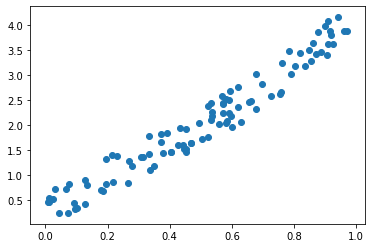

In [3]:
x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

Before you start the training process, you need to convert the numpy array to Variables that supported by Torch and autograd 

In [4]:
# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print(x, y)

tensor([[0.3147],
        [0.7902],
        [0.6196],
        [0.2686],
        [0.9166],
        [0.3731],
        [0.8480],
        [0.0926],
        [0.2293],
        [0.4439],
        [0.9620],
        [0.4260],
        [0.5722],
        [0.1033],
        [0.4669],
        [0.9255],
        [0.6000],
        [0.9094],
        [0.4526],
        [0.5355],
        [0.3318],
        [0.2799],
        [0.5574],
        [0.5807],
        [0.5849],
        [0.4528],
        [0.6972],
        [0.8993],
        [0.3332],
        [0.4694],
        [0.7535],
        [0.1258],
        [0.2169],
        [0.8540],
        [0.0090],
        [0.9185],
        [0.4334],
        [0.7853],
        [0.5701],
        [0.6563],
        [0.2154],
        [0.3074],
        [0.8716],
        [0.4943],
        [0.5908],
        [0.5943],
        [0.5973],
        [0.1958],
        [0.9087],
        [0.0754],
        [0.4510],
        [0.5332],
        [0.5362],
        [0.7622],
        [0.6617],
        [0

3. Optimizer and Loss

Next, you should define the Optimizer and the Loss Function for our training process. 

In [5]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()


4. Training

Now let's start our training process. With an epoch of 250, you will iterate our data to find the best value for our hyperparameters. 

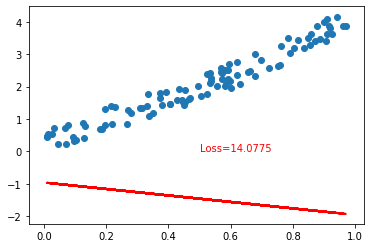

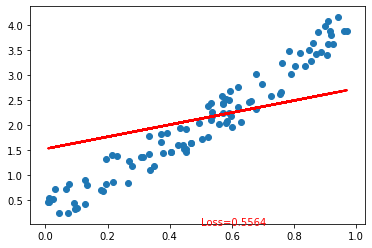

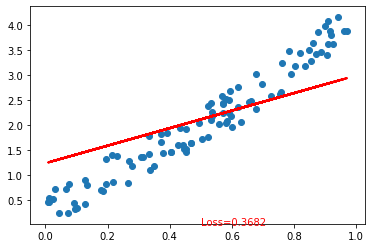

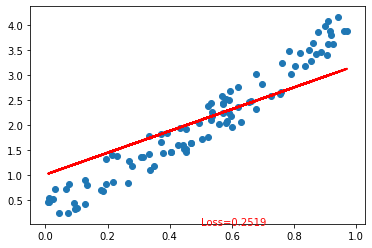

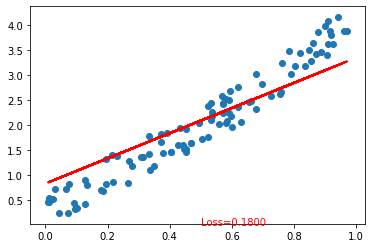

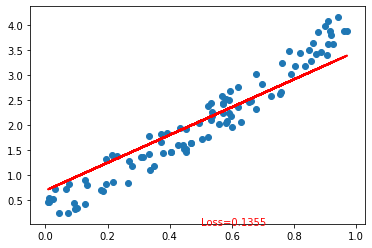

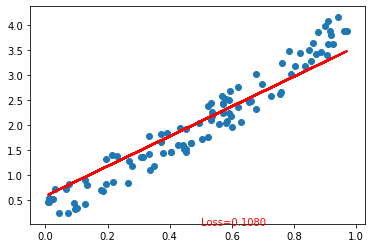

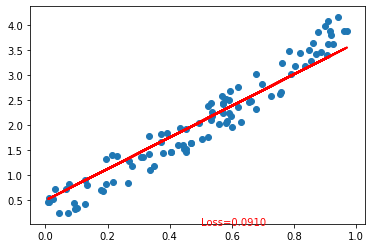

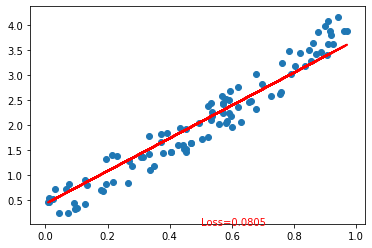

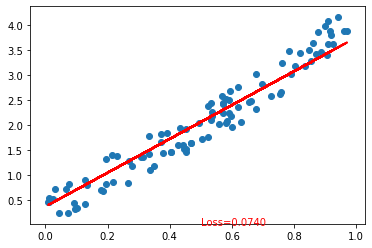

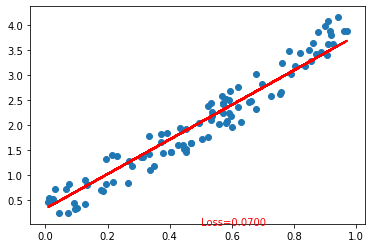

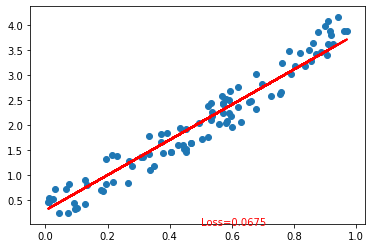

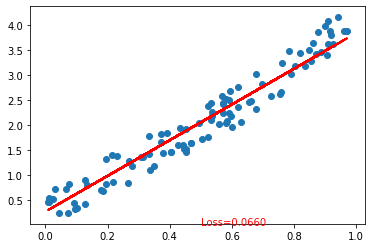

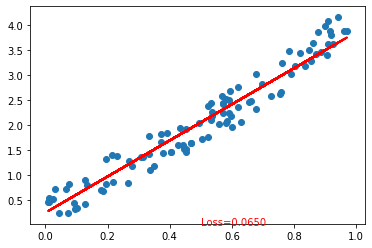

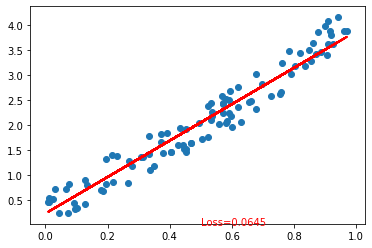

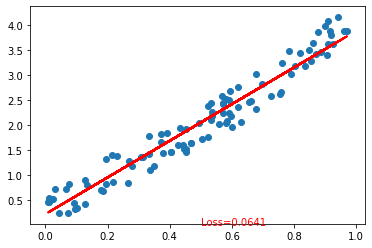

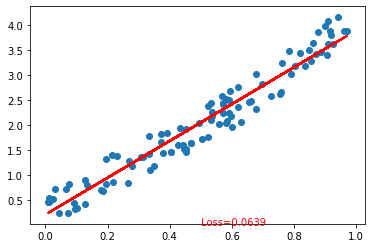

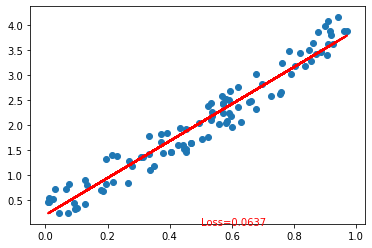

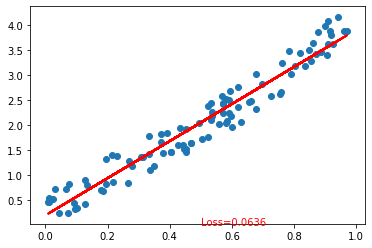

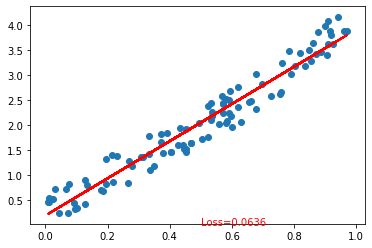

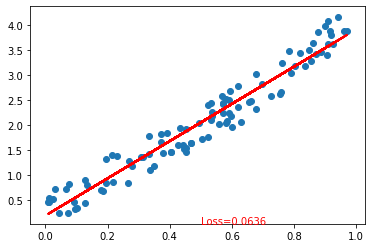

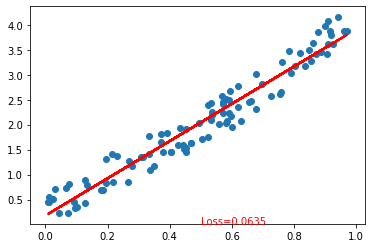

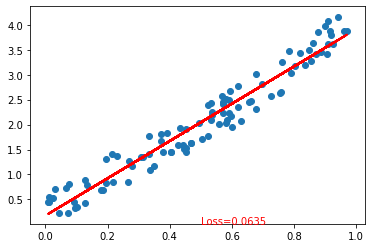

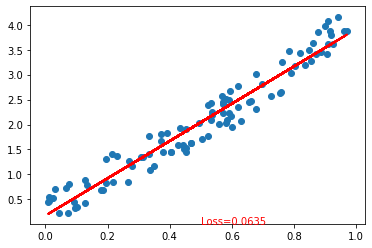

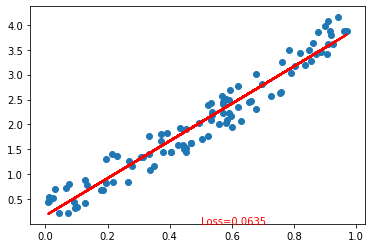

In [6]:
inputs = Variable(x)
outputs = Variable(y)

for i in range(250):
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 10 == 0:
       # plot and show learning process
       plt.cla()
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
       plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
       plt.pause(0.1)

plt.show()

5. Result

As you can see below, you successfully performed regression with a neural network. Actually, on every iteration, the red line in the plot will update and change its position to fit the data. But in this picture, you only show you the final result

## Task
Next, trying to regress the random function $Y = x^5cos(x) - 3x + rand(100)$ by the neural network. Required to use other optimizer and loss function.

In [7]:
##INSERT YOUR CODE HERE


